In [3]:
import joblib
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
import scipy.stats as st 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score ,accuracy_score, classification_report, confusion_matrix, mean_squared_error,precision_score, recall_score, multilabel_confusion_matrix, roc_auc_score ,roc_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2 as l2_keras
from tensorflow.keras.optimizers import Adam
from sklearn import svm , datasets
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

In [4]:
df = pd.read_csv('D:\\CS Materials\\pf.csv')
dataName = 'D:\\CS Materials\\pf.csv'
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4140 non-null   int64  
 1   age              4140 non-null   int64  
 2   Smoker           4140 non-null   int64  
 3   CigsPerDay       4112 non-null   float64
 4   BPMeds           4089 non-null   float64
 5   PrevalentStroke  4140 non-null   int64  
 6   PrevalentHyp     4140 non-null   int64  
 7   Diabetes         4140 non-null   int64  
 8   Cholesterol      4091 non-null   float64
 9   sysBP            4140 non-null   float64
 10  diaBP            4140 non-null   float64
 11  BMI              4121 non-null   float64
 12  HeartRate        4139 non-null   float64
 13  Glucose          3763 non-null   float64
 14  target           4140 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 485.3 KB
None


,sex,age,Smoker,CigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,Cholesterol,sysBP,diaBP,BMI,HeartRate,Glucose,target
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4136,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4137,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4138,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [5]:
missing_data=df.isnull().sum()
print("\nMissing data:")
print(missing_data)
total_percentage=(missing_data.sum()/df.shape[0])*100
print(f"The total percentage of missing data is {round(total_percentage,2)}%")


Missing data:
sex                  0
age                  0
Smoker               0
CigsPerDay          28
BPMeds              51
PrevalentStroke      0
PrevalentHyp         0
Diabetes             0
Cholesterol         49
sysBP                0
diaBP                0
BMI                 19
HeartRate            1
Glucose            377
target               0
dtype: int64
The total percentage of missing data is 12.68%


In [6]:
# Handling missing values using imputation strategies
mean_imputer = SimpleImputer(strategy='mean')
mean_cols = ['HeartRate']
df[mean_cols] = mean_imputer.fit_transform(df[mean_cols])

median_imputer = SimpleImputer(strategy='median')
median_cols = [ 'CigsPerDay', 'BPMeds', 'Cholesterol', 'BMI', 'Glucose']
df[median_cols] = median_imputer.fit_transform(df[median_cols])


In [7]:
# Handling outliers using the IQR method
def handle_outliers_with_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

continuous_cols = ['age', 'CigsPerDay', 'Cholesterol', 'sysBP', 'diaBP', 'BMI', 'HeartRate', 'Glucose']
for col in continuous_cols:
    handle_outliers_with_IQR(df, col)


In [8]:
df.head()
df.columns
df.isnull().sum()
df.shape

(4140, 15)

In [9]:
target_column = 'target'
class_counts_before = df[target_column].value_counts()

In [10]:
categorical_features=['sex','Smoker','BPMeds','PrevalentStroke','PrevalentHyp','Diabetes']

In [11]:
for feature in categorical_features:
  print(feature,":")
  print(df[feature].value_counts())
  print("------------------")

sex :
sex
0    2363
1    1777
Name: count, dtype: int64
------------------
Smoker :
Smoker
0    2088
1    2052
Name: count, dtype: int64
------------------
BPMeds :
BPMeds
0.0    4020
1.0     120
Name: count, dtype: int64
------------------
PrevalentStroke :
PrevalentStroke
0    4115
1      25
Name: count, dtype: int64
------------------
PrevalentHyp :
PrevalentHyp
0    2854
1    1286
Name: count, dtype: int64
------------------
Diabetes :
Diabetes
0    4033
1     107
Name: count, dtype: int64
------------------


In [12]:
# Upsampling the minority class
data_majority = df[df[target_column] == 0]
data_minority = df[df[target_column] == 1]
data_minority_upsampled = resample(data_minority, replace=True, n_samples=len(data_majority), random_state=123)
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

In [13]:
# Splitting the dataset into features and target variable
X = data_upsampled.drop(target_column, axis=1)
y = data_upsampled[target_column]

In [14]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
model = XGBClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [15]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       715
           1       0.87      0.98      0.92       689

    accuracy                           0.92      1404
   macro avg       0.92      0.92      0.92      1404
weighted avg       0.92      0.92      0.92      1404



In [18]:
#accuracy
accuracy = accuracy_score(y_test,y_pred)
print(f"Using XGB we get an accuracy of {round(accuracy*100,2)}%")

Using XGB we get an accuracy of 91.6%


<Axes: >

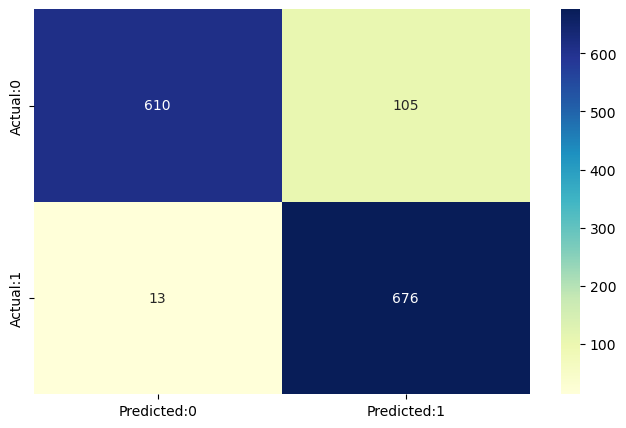

In [19]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [20]:
# Calculate metrics
report = classification_report(y_test, y_pred, output_dict=True)
accuracy = report['accuracy']
precision = report['1']['precision']
recall = report['1']['recall']
f1_score = report['1']['f1-score']

# Print the classification report
print(classification_report(y_test, y_pred))

# Store the metrics for the XGBoost model
xgb_metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1_score
}
print(xgb_metrics)
print ("===========================================================================")
xgb_metrics = {
    'Accuracy': round(accuracy*100,2),
    'Precision': round(precision*100,2),
    'Recall': round(recall*100,2),
    'F1-score': round(f1_score*100,2)
}
print(xgb_metrics)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       715
           1       0.87      0.98      0.92       689

    accuracy                           0.92      1404
   macro avg       0.92      0.92      0.92      1404
weighted avg       0.92      0.92      0.92      1404

{'Accuracy': 0.915954415954416, 'Precision': 0.8655569782330346, 'Recall': 0.9811320754716981, 'F1-score': 0.9197278911564626}
{'Accuracy': 91.6, 'Precision': 86.56, 'Recall': 98.11, 'F1-score': 91.97}


In [21]:
import numpy as np

# Define the new data with correct formatting and including column names
new_data = np.array([[1, 56, 1, 20, 0, 0, 1, 0, 217, 200, 120, 33.71, 68, 72]])

# Make predictions on the new data
new_pred = model.predict(new_data)

print("New Data Predictions:", new_pred)


New Data Predictions: [1]


In [22]:
# Create a DataFrame with sample input data
sample_data = pd.DataFrame({
    'sex': [0],               # 1 for male, 0 for female
    'age': [44],              # Age of the individual
    'Smoker': [0],            # 1 for smoker, 0 for non-smoker
    'CigsPerDay': [0],        # Number of cigarettes per day for smokers
    'BPMeds': [0],            # 1 if taking blood pressure medications, 0 otherwise
    'PrevalentStroke': [0],   # 1 if the individual had a prevalent stroke, 0 otherwise
    'PrevalentHyp': [0],      # 1 if the individual has prevalent hypertension, 0 otherwise
    'Diabetes': [0],          # 1 if the individual has diabetes, 0 otherwise
    'Cholesterol': [229],     # Cholesterol level
    'sysBP': [119],           # Systolic blood pressure
    'diaBP': [75.5],          # Diastolic blood pressure
    'BMI': [25.09],           # Body Mass Index (BMI)
    'HeartRate': [70],        # Heart rate
    'Glucose': [88]  # Glucose level
})

# Make predictions on the new data
new_pred = model.predict(sample_data)
print("New Data Predictions:", new_pred)

New Data Predictions: [0]


In [23]:
import numpy as np

# Define the new data with correct formatting and including column names
new_data = np.array([
   [0, 56, 1, 5, 0, 0, 0, 0, 310, 128.5, 82, 25.36, 70, 85],
    [0, 36, 0, 0, 0, 0, 0, 0, 213, 126, 80, 19.53, 95, 79],
    [1, 63, 0, 0, 0, 0, 0, 0, 233, 130, 81, 25.82, 80, 81],
    [0, 62, 1, 3, 0, 0, 1, 0, 298, 137, 85, 26.73, 76, 87],
    [0, 44, 0, 0, 0, 0, 0, 0, 229, 119, 75.5, 25.09, 70, 88],
    [0, 41, 1, 9, 0, 0, 0, 0, 200, 124, 76, 24.2, 80, 86],
    [0, 56, 0, 0, 0, 0, 1, 0, 301, 127.5, 91.5, 25.39, 80, 74],
    [1, 56, 1, 20, 0, 0, 1, 0, 217, 200, 120, 33.71, 68, 72],
    [0, 61, 0, 0, 0, 0, 0, 0, 350, 115, 60, 25.5, 76, 99],
    [0, 50, 1, 30, 0, 0, 1, 0, 287, 147.5, 87.5, 30.36, 64, 72],
    [0, 55, 0, 0, 0, 0, 0, 0, 310, 135, 76.5, 26.31, 110, 74],
    [0, 38, 0, 0, 0, 0, 0, 0, 251, 126, 76, 29.19, 60, 66],
    [0, 40, 0, 0, 0, 0, 0, 0, 236, 98, 75, 26.63, 70, 52],
    [0, 47, 1, 40, 0, 0, 0, 0, 221, 144, 91, 35.78, 85, 66],
    [1, 49, 1, 20, 0, 0, 0, 0, 222, 124, 86, 27.25, 80, 110],
    [1, 54, 1, 30, 0, 0, 0, 0, 219, 113, 70, 20.41, 80, 53],
    [0, 40, 0, 0, 0, 0, 0, 0, 290, 125, 90, 32.81, 85, 87],
    [1, 63, 1, 30, 0, 0, 1, 0, 225, 146, 82, 27.17, 70, 85],
    [0, 65, 0, 0, 0, 0, 0, 0, 288, 146, 94.5, 26.54, 80, 74],
    [0, 50, 0, 0, 0, 0, 0, 0, 225, 132, 81, 23.62, 74, 103],
    [1, 54, 1, 20, 0, 0, 0, 0, 215, 120, 85, 29.93, 62, 75],
    [0, 39, 1, 15, 0, 0, 1, 0, 280, 152, 104, 24.22, 90, 82],
    [1, 46, 0, 0, 0, 0, 1, 0, 235, 136.5, 92, 22.92, 68, 89],
    [0, 53, 1, 3, 0, 0, 0, 0, 239, 112.5, 67, 25.63, 77, 74],
    [1, 48, 1, 20, 0, 0, 1, 1, 230, 135.5, 90, 25.34, 95, 91],
    [0, 51, 1, 20, 0, 0, 0, 0, 300, 128, 78, 26.69, 65, 97],
    [1, 64, 0, 0, 0, 0, 0, 0, 283, 113, 77, 22.73, 75, 67]
])

# Make predictions on the new data
new_pred = model.predict(new_data)

print("New Data Predictions:", new_pred)


New Data Predictions: [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]


In [24]:
joblib.dump(model, 'model.pkl')

['model.pkl']